# CARGA Y EXPLORACION DE DATOS
# Justificacion
He reducido el dataset a unas 100000 entradas o reviews, pero conservando el porcentaje para cada una de las valoraciones de la rewievs. El conjunto de datos presenta un claro desbalanceo algo que ya me esperaba.
Observo que las rewievs concentran la mayoria de los token con palabras muy relacionadas con la tematica (software) por lo que el texto se observa lleno de palabras muy tecnicas, asi como mucha numeracion relacionada al sofware. Creo que para el modelo funcione en el analisis de sentimeintos todas estas palabras han de ser eliminadas. En las rewievs negativas quizas conserve palabras como "no" ya que se presenta como un patron repetido  que definen una valoracion negativa  en el texto 
He dividido las rewievs en dos gropos "postitivas2 y "negativas" y he ido analizando paso a paso el proceso de limpieza para ver que es lo mejor que me convendria al modelo.
Con un Esquema de relacion de entidades he sacado la lista que le voy a pasar al stopword para eliminarlas del modelo:
En la nume de palabras las palabras en las rewievs positivas estan mas acordes a las que aparecen en la nube de palabras "Negativas".

In [1]:
import json
import pandas as pd
df = pd.read_json('Software.json', lines=True)

In [2]:
df_limpio=pd.DataFrame(df[['overall','reviewText']])
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     459436 non-null  int64 
 1   reviewText  459370 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [3]:
# VOY A REDUCIR EL DATAFRAME PORQUE TENGO LOS RECURSOS ALGO LIMITADOS Y LO ESTOY HACIENDO EN LOCAL
#CON JUPYTER. CONNCOLAB ESTOY TENIEND MMUCHOS PROBLEMAS.
df_limpio=df_limpio.sample(n = 100000)
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 126010 to 235297
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     100000 non-null  int64 
 1   reviewText  99986 non-null   object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [4]:
# Divison del tataframe en positivos y negativos

negativo=df_limpio['overall']<=2
df_limpio_negativo=df_limpio[negativo]
df_limpio_negativo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29180 entries, 126010 to 449363
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     29180 non-null  int64 
 1   reviewText  29179 non-null  object
dtypes: int64(1), object(1)
memory usage: 683.9+ KB


In [5]:
positivo=df_limpio['overall']>2
df_limpio_positivo=df_limpio[positivo]
df_limpio_positivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70820 entries, 339401 to 235297
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     70820 non-null  int64 
 1   reviewText  70807 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
num_neg=df_limpio_negativo['reviewText'].count()
num_pos=df_limpio_positivo['reviewText'].count()
print(f'Tengo {num_neg} reviews Negativas y {num_pos} reviews positivas. Por tanto estamos anteun dataset desbalanceado.Mas adelante intentaremos solucionar este problema')



Tengo 29179 reviews Negativas y 70807 reviews positivas. Por tanto estamos anteun dataset desbalanceado.Mas adelante intentaremos solucionar este problema


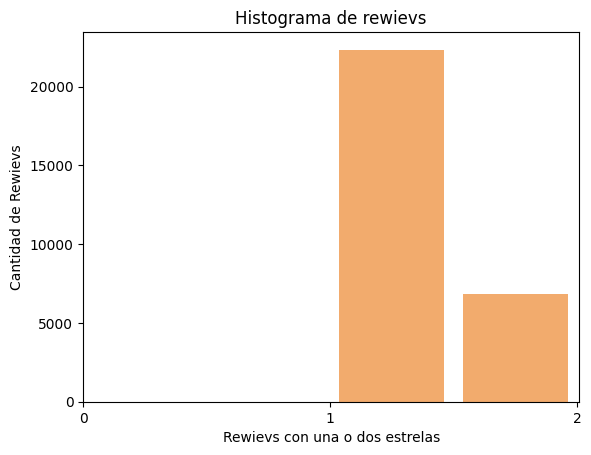

In [7]:
# Exploramos un poco los datos en las rewiev negativas y positivas.
import matplotlib.pyplot as plot

rewievs = ['1 Estrella', '2 Estrellas']

plot.hist(x=df_limpio_negativo['overall'], bins=2, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de rewievs')
x=[0,1,2]
plot.xticks(x)
plot.xlabel('Rewievs con una o dos estrelas')
plot.ylabel('Cantidad de Rewievs')


plot.show() #dibujamos el histograma


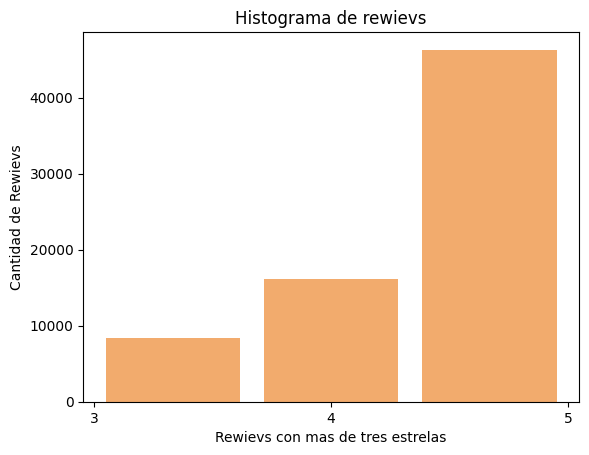

In [8]:
# Exploramos un poco los datos en las rewiev negativas y positivas.
import matplotlib.pyplot as plot

rewievs = ['3 Estrella', '4 Estrellas', '5 Estrellas']

plot.hist(x=df_limpio_positivo['overall'], bins=3, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de rewievs')
x=[3,4,5]
plot.xticks(x)
plot.xlabel('Rewievs con mas de tres estrelas')
plot.ylabel('Cantidad de Rewievs')


plot.show() #dibujamos el histograma

### Nube de palabras

Nube de palabras para rewievs Negativas


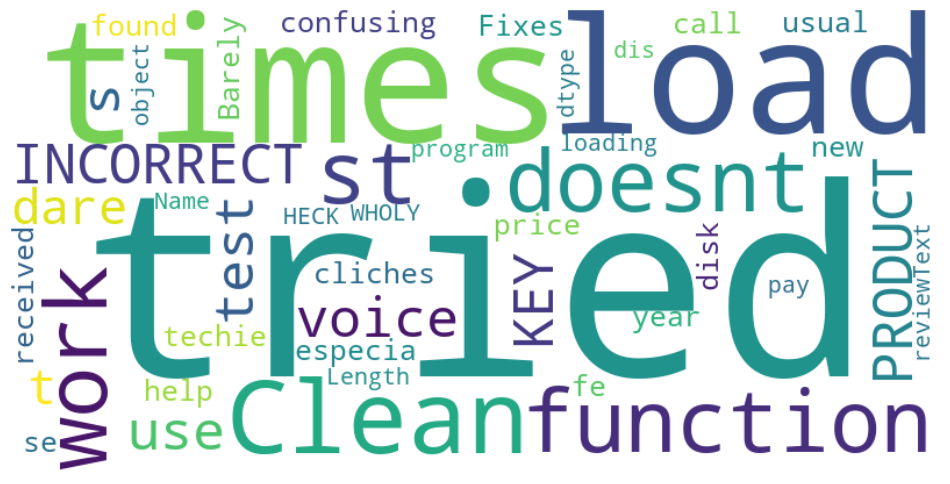

In [9]:
#!pip install wordcloud

print("Nube de palabras para rewievs Negativas")
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear DataFrame de ejemplo
df = pd.DataFrame(df_limpio_negativo['reviewText'])

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate((str(df['reviewText'])))

# Graficar la nube de palabras
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Nube de palabras para rewievs Positivas


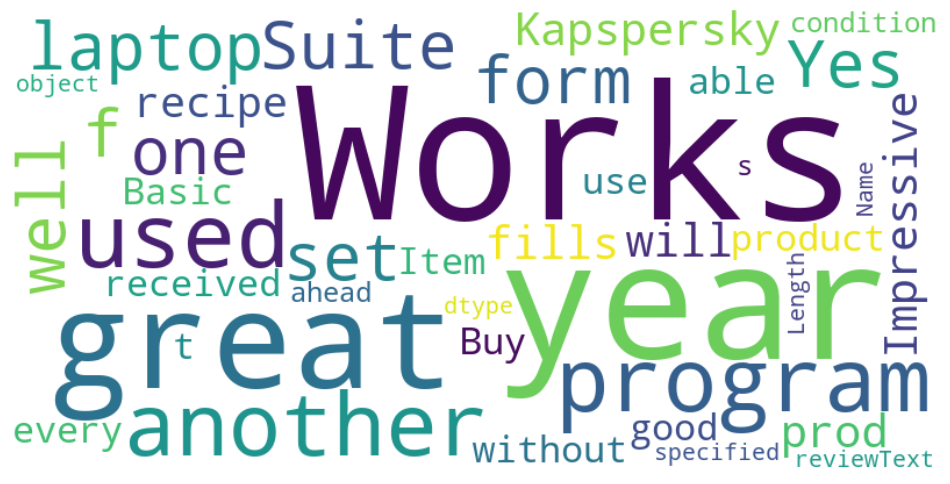

In [10]:
print("Nube de palabras para rewievs Positivas")
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear DataFrame de ejemplo
df = pd.DataFrame(df_limpio_positivo['reviewText'])

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate((str(df['reviewText'])))

# Graficar la nube de palabras
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:

#!pip install -U spacy
#!pip  -m spacy download en_core_web_sm
import spacy
#!pip3 install -U spacy download en_core_web_sm
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

dic_neg=df_limpio_negativo['reviewText'].to_dict()
dic_pos=df_limpio_positivo['reviewText'].to_dict()
an=list(dic_neg.keys())
ap=list(dic_pos.keys())


nlp = en_core_web_sm.load()

doc = nlp(dic_pos[ap[1]])
print('Ejemplo de Tokens en rewies positivas\n\n',[(w.text, w.pos_) for w in doc])
print("\n")
nlp = en_core_web_sm.load()
doc = nlp(dic_neg[an[0]])
print('Ejemplo de Tokens en rewies negativas\n\n',[(w.text, w.pos_) for w in doc])

Ejemplo de Tokens en rewies positivas

 [('Great', 'ADJ'), ('program', 'NOUN'), ('used', 'VERB'), ('it', 'PRON'), ('in', 'ADP'), ('one', 'NUM'), ('form', 'NOUN'), ('or', 'CCONJ'), ('another', 'DET'), ('for', 'ADP'), ('many', 'ADJ'), ('years', 'NOUN'), ('.', 'PUNCT'), ('Never', 'ADV'), ('had', 'VERB'), ('a', 'DET'), ('"', 'PUNCT'), ('hack', 'NOUN'), ('attack', 'NOUN'), ('"', 'PUNCT'), ('knock', 'VERB'), ('on', 'ADP'), ('wood', 'NOUN'), (',', 'PUNCT'), ('good', 'ADJ'), ('insurance', 'NOUN'), ('!', 'PUNCT')]


Ejemplo de Tokens en rewies negativas

 [('I', 'PRON'), ('tried', 'VERB'), ('over', 'ADP'), ('4', 'NUM'), ('times', 'NOUN'), ('to', 'PART'), ('load', 'VERB'), ('this', 'DET'), ('.', 'PUNCT'), (' ', 'SPACE'), ('I', 'PRON'), ('had', 'VERB'), ('the', 'DET'), ('PrintMaster', 'PROPN'), ('18', 'NUM'), ('CD', 'NOUN'), ('which', 'DET'), ('worked', 'VERB'), ('perfectly', 'ADV'), ('on', 'ADP'), ('my', 'PRON'), ('Windows', 'PROPN'), ('7', 'NUM'), ('computer', 'NOUN'), ('but', 'CCONJ'), ('this'

### Frecuencia de palabras

In [12]:
print("Palabras más usadas, para definir el sentimiento positivo")
df_limpio_positivo['reviewText'].value_counts(ascending=False, sort=True).head(10)

Palabras más usadas, para definir el sentimiento positivo


Great            182
good             165
great            148
Good             140
ok               115
Excellent         97
Great product     64
Love it           62
works great       61
love it           55
Name: reviewText, dtype: int64

In [13]:
print("Palabras más usadas, para definir el sentimiento negativo")
df_limpio_negativo['reviewText'].value_counts(ascending=False, sort=True).head(10)

Palabras más usadas, para definir el sentimiento negativo


did not work     12
Bad              11
Did not work.     8
Did not work      8
ok                8
Didn't work.      7
Didn't work       7
junk              6
Junk              6
no good           6
Name: reviewText, dtype: int64

### Frecuencia de palabras en rewievs Positivas

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

In [15]:
text=pd.DataFrame(df_limpio_positivo['reviewText'])
text=str(text)
words_nltk = text.lower().split()

In [16]:
words_nltk[:10]

['reviewtext',
 '339401',
 'works',
 'great',
 'on',
 'my',
 'laptop',
 '210790',
 'great',
 'program']

In [17]:
wf = Counter(words_nltk)
wf_most_common = wf.most_common(20)
wf_most_common

[('works', 4),
 ('...', 3),
 ('i', 3),
 ('great', 2),
 ('my', 2),
 ('program', 2),
 ('used', 2),
 ('in', 2),
 ('another', 2),
 ('this', 2),
 ('of', 2),
 ('own', 2),
 ('and', 2),
 ('for', 2),
 ('years', 2),
 ('to', 2),
 ('reviewtext', 1),
 ('339401', 1),
 ('on', 1),
 ('laptop', 1)]

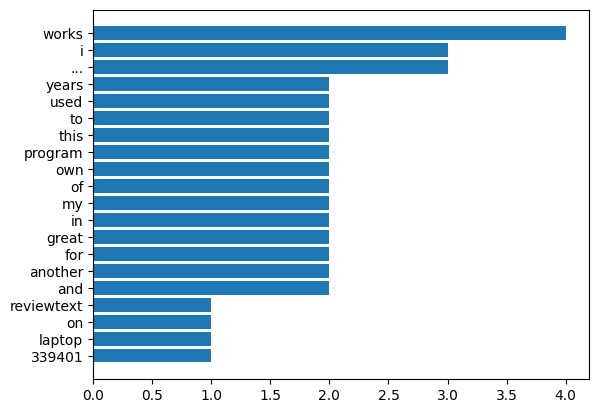

In [18]:
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))
plt.barh(words, freqs)
plt.show()

In [19]:
### Frecuencia de palabras en rewievs Negativas

In [20]:
text=pd.DataFrame(df_limpio_negativo['reviewText'])
text=str(text)
words_nltk = text.lower().split()

In [21]:
words_nltk[:10]

['reviewtext',
 '126010',
 'i',
 'tried',
 'over',
 '4',
 'times',
 'to',
 'load',
 'this.']

In [22]:
wf = Counter(words_nltk)
wf_most_common = wf.most_common(20)
wf_most_common

[('the', 5),
 ('i', 3),
 ('...', 3),
 ('for', 3),
 ('to', 2),
 ('this', 2),
 ('you', 2),
 ('a', 2),
 ('1', 2),
 ('reviewtext', 1),
 ('126010', 1),
 ('tried', 1),
 ('over', 1),
 ('4', 1),
 ('times', 1),
 ('load', 1),
 ('this.', 1),
 ('had', 1),
 ('330402', 1),
 ('clean', 1)]

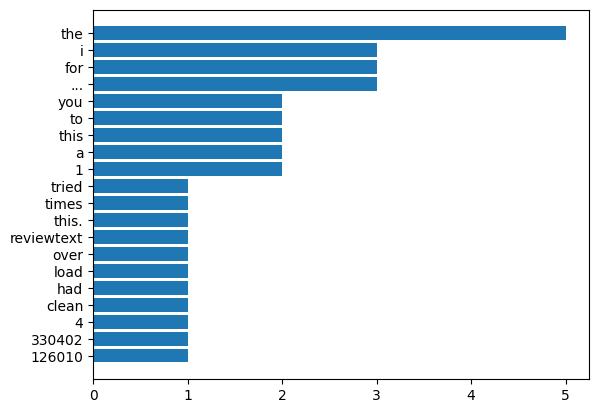

In [23]:
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))
plt.barh(words, freqs)
plt.show()

In [24]:
# from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from nltk.probability import FreqDist

In [25]:
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))

In [26]:
bigrams_[:20]

[('reviewtext', '126010'),
 ('126010', 'i'),
 ('i', 'tried'),
 ('tried', 'over'),
 ('over', '4'),
 ('4', 'times'),
 ('times', 'to'),
 ('to', 'load'),
 ('load', 'this.'),
 ('this.', 'i'),
 ('i', 'had'),
 ('had', 'the'),
 ('the', '...'),
 ('...', '330402'),
 ('330402', 'the'),
 ('the', 'clean'),
 ('clean', 'function'),
 ('function', 'on'),
 ('on', 'this'),
 ('this', 'doesnt')]

In [27]:
trigrams_[:20]

[('reviewtext', '126010', 'i'),
 ('126010', 'i', 'tried'),
 ('i', 'tried', 'over'),
 ('tried', 'over', '4'),
 ('over', '4', 'times'),
 ('4', 'times', 'to'),
 ('times', 'to', 'load'),
 ('to', 'load', 'this.'),
 ('load', 'this.', 'i'),
 ('this.', 'i', 'had'),
 ('i', 'had', 'the'),
 ('had', 'the', '...'),
 ('the', '...', '330402'),
 ('...', '330402', 'the'),
 ('330402', 'the', 'clean'),
 ('the', 'clean', 'function'),
 ('clean', 'function', 'on'),
 ('function', 'on', 'this'),
 ('on', 'this', 'doesnt'),
 ('this', 'doesnt', 'work;')]

In [28]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)
tg_freq.most_common(10)

[(('reviewtext', '126010', 'i'), 1),
 (('126010', 'i', 'tried'), 1),
 (('i', 'tried', 'over'), 1),
 (('tried', 'over', '4'), 1),
 (('over', '4', 'times'), 1),
 (('4', 'times', 'to'), 1),
 (('times', 'to', 'load'), 1),
 (('to', 'load', 'this.'), 1),
 (('load', 'this.', 'i'), 1),
 (('this.', 'i', 'had'), 1)]

In [29]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [30]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

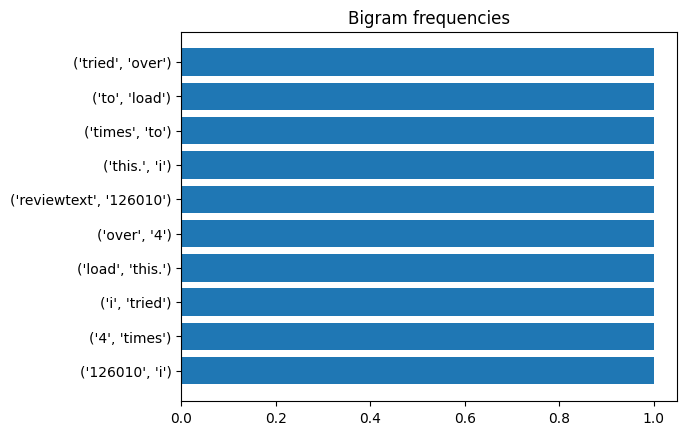

In [31]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

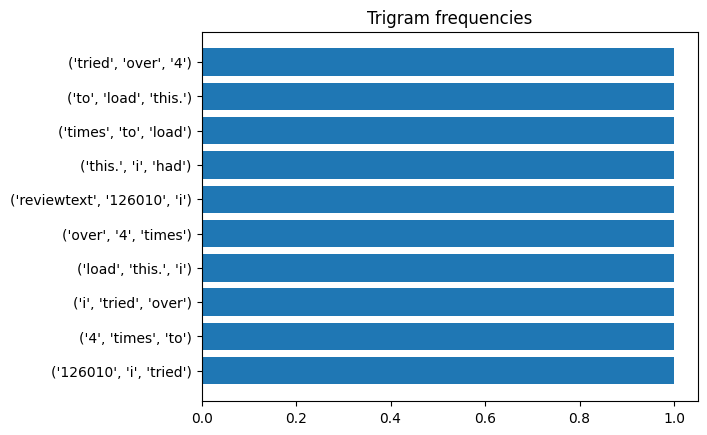

In [32]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

In [33]:

# Cargar modelo pre-entrenado en inglés
nlp = spacy.load('en_core_web_sm')

def ERN(texto):
    try:
        doc = nlp(texto)
        for entidad in doc.ents:
            return entidad.text
    except TypeError as err: 
        pass
Entidades_renombradas_pos = df_limpio_positivo.reviewText.apply(ERN)
Entidades_renombradas_neg=df_limpio_negativo.reviewText.apply(ERN)

In [34]:
Entidades_renombradas_neg.head(10)

126010                   over 4
330402                        3
243821    INCORRECT PRODUCT KEY
454404                     None
98213                      None
218911                    First
113082                     2010
168651                    Stick
361366                        8
453726             BUYER BEWARE
Name: reviewText, dtype: object

In [35]:
Entidades_renombradas_pos.head(10)

339401           None
210790     many years
386104    Works Suite
416530     Kapspersky
234611            One
45938            None
238408      RECOMMEND
194916      next year
272357       TurboTax
174853           None
Name: reviewText, dtype: object

In [46]:
Entidades_renombradas_pos=list(Entidades_renombradas_pos)
Entidades_renombradas_neg=list(Entidades_renombradas_neg)

union=Entidades_renombradas_neg +Entidades_renombradas_neg

In [49]:
lista=set(union)

In [52]:
lista_stopword=pd.DataFrame(lista,columns=['stopwords'])
lista_stopword.head()

,stopwords
0,Flight Simulator
1,between 2 and 6 years old
2,Pentax K50
3,well over 10 years
4,Dell running Windows 10


In [54]:


lista_stopword.to_csv('lista_stopword.csv', header=False, index=False)
lista_stopword.to_csv('lista_stopword.txt', header=False, index=False)